<a href="https://colab.research.google.com/github/isabelaacr/Ciencia_de_dados_2/blob/main/Aula_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos começar esta aula sobre regressão logística usando um problema de classificação binária simples: como prever se um aluno será aprovado ou não com base em horas de estudo.

* **Variável independente (X):** Horas de estudo.
* **Variável dependente (y):** Aprovado (1) ou Reprovado (0).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

dados = {
    "Horas_Estudo": [1, 2, 3, 4, 5, 6],
    "Aprovado": [0, 0, 0, 1, 1, 1]
}

df = pd.DataFrame(dados)
df


,Horas_Estudo,Aprovado
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1
5,6,1


<function matplotlib.pyplot.show(close=None, block=None)>

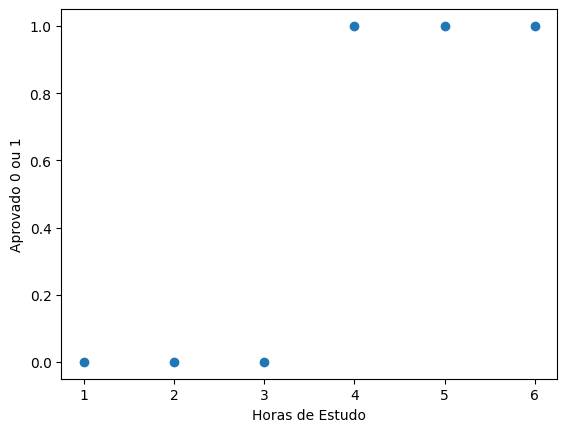

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['Horas_Estudo'], df['Aprovado'])
plt. xlabel('Horas de Estudo')
plt.ylabel('Aprovado 0 ou 1')
plt.show

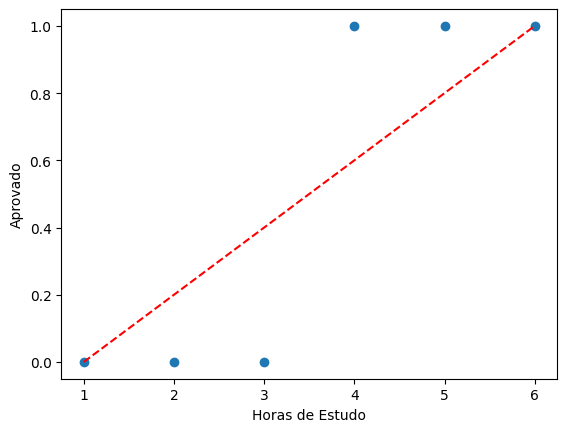

In [ ]:
plt.scatter(dados["Horas_Estudo"], dados["Aprovado"])
plt.plot([1,6], [0,1], color = 'red', linestyle ='--')
plt.xlabel("Horas de Estudo")
plt.ylabel("Aprovado")
plt.show()

## Passo 1: Função Logística
$P(y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}$

**Coeficientes hipotéticos**:
- $\beta_0 = -5 $
- $\beta_1 = 1.5 $

---

## Passo 2: Cálculo para X=4
$ z = -5 + 1.5 \times 4 = 1 $

$ P(y=1) = \frac{1}{1 + e^{-1}} $

**Contas passo a passo**:

 $ e^{-1} \approx 0.3679 $

 $ 1 + 0.3679 = 1.3679 $

 $ \frac{1}{1.3679} \approx 0.731 $


**Resultado**:
- Probabilidade de aprovação para 4 horas de estudo ≈ **73.1%**

---

## Passo 3: Ponto de Decisão (50%)
Encontre $X$ onde $ P(y=1) = 0.5$:

$ -5 + 1.5X = 0 $

$ 1.5X = 5 $

$ X = \frac{5}{1.5} \approx 3.33 $

**Interpretação**:
- Alunos que estudam **mais de 3.33 horas** têm >50% de chance de aprovação.


Text(0, 0.5, 'Prob.de ser aprovado')

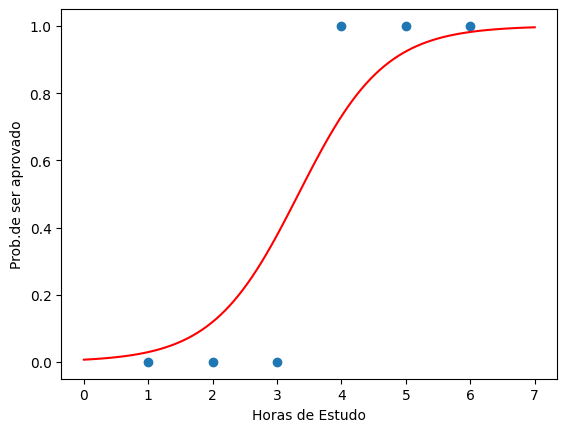

In [7]:
import numpy as np
x_curva = np.linspace(0,7,100)

# Montar a sigmoide (calcular a prob)
probabilidade = 1/(1+np.exp(-(-5+1.5*x_curva)))

plt.scatter(df['Horas_Estudo'], df['Aprovado'])
plt.plot(x_curva, probabilidade, color='red')
plt.xlabel("Horas de Estudo")
plt.ylabel("Prob.de ser aprovado")

In [9]:
# treinamento da regressão logística

from sklearn.linear_model import LogisticRegression

x= df['Horas_Estudo'].values.reshape(-1, 1)
y= df['Aprovado']

modelo = LogisticRegression()
modelo.fit(x,y)

LogisticRegression()

In [10]:
print(f"Intercepto:  {modelo.intercept_}")
print(f"Coeficientes: {modelo.coef_}")

Intercepto:  [-3.9223039]
Coeficientes: [[1.12069525]]


**Exercício:** Dado que agora encontramos os coeficientes reais dos dados, calcule manualmente: Encontre $X$ onde $ P(y=1) = 0.5$:



**Interpretação**:


In [12]:
# vamos fazer a previsão a partir do modelo de regressão logística induzido (treinado)

print('Probabilidade para 4 horas: ', modelo.predict_proba([[4]])[0][1])
print('Previsão da classe para 4 horas:', modelo.predict([[4]]))

Probabilidade para 4 horas:  0.6365629265347539
Previsão da classe para 4 horas: [1]


Text(0, 0.5, 'Prob de ser aprovado')

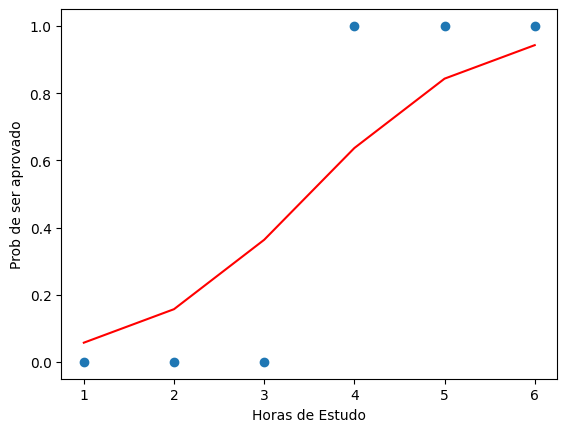

In [15]:
plt.scatter(x,y)
plt.plot(x, modelo.predict_proba(x)[:,1], color='red')
plt.xlabel("Horas de Estudo")
plt.ylabel("Prob de ser aprovado")

In [16]:
dados_teste = {
    "Horas_Estudo": [6.5, 3.5, 4.5, 1.5, 5.5],
    "Aprovado": [0, 1, 1, 0, 1]
}

df_teste = pd.DataFrame(dados_teste)

In [20]:
# previsões
x_teste = df_teste["Horas_Estudo"].values.reshape(-1, 1)
df_teste["Aprovado_PREVISTO"] = modelo.predict(x_teste)
df_teste["Probabilidade"] = modelo.predict_proba(x_teste)[:, 1]
df_teste

,Horas_Estudo,Aprovado,Aprovado_PREVISTO,Probabilidade
0,6.5,0,1,0.966503
1,3.5,1,1,0.500032
2,4.5,1,1,0.754142
3,1.5,0,0,0.096106
4,5.5,1,1,0.903917


In [21]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(df_teste["Aprovado"], previsoes)
print(f"Acurácia: {acuracia}")

Acurácia: 0.8


**Exercício 1:** Carregue os datasets ``dados_aprovacao_treino.csv`` e ``dados_aprovacao_teste.csv``. Analise quais são as colunas existentes e faça o treinamento do algoritmos de regressão logística. Em seguida, faça o teste do modelo de regressão induzido, utilizando o conjunto de dados de teste.

**Exercício 2:** avalie a necessidade de aplicar algum pré-processamento nos dados (identificação de outliers, normalização, desbalanceamento das classes, etc.) Em caso afirmativo, retreine e reavalie o modelo novamente. Lembre-se que o pré-processamento também precisa ser aplicado nos dados de teste.
Caso você verifique que nada disso é necessário, tente justificar o porquê.

Dicas:

* a regressão logísitca é robusta contra valores com escalas diferentes, ou seja, normalizar os dados tende a não ter tanto impacto assim neste algoritmo. Entretanto, isso não se aplica quando usamos regularização na regressão. Pesquise e estude mais sobre isso.

* a regressão logísitica também é robusta à outliers, mas não à prova. Então, sempre é válido averiguar sua existência

* ela é sensível ao desbalanceamento das classes. Se esse for o caso, pesquise e teste a biblioteca SMOTE que faz uma amostragem de forma facilitada.
  * from imblearn.over_sampling import SMOTE

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_aprovacao_treino = pd.read_csv('dados_aprovacao_2variaveis_treino.csv')
df_aprovacao_teste = pd.read_csv('dados_aprovacao_2variaveis_teste.csv')
df_aprovacao_treino.head()


,Horas_Estudo,Simulados_Realizados,Aprovado
0,6.0,7,1
1,4.7,5,1
2,6.3,9,1
3,8.0,9,1
4,4.5,6,1


In [23]:
from sklearn.linear_model import LogisticRegression

x= df_aprovacao_treino[['Horas_Estudo', 'Simulados_Realizados']].values.reshape(-1, 2)
y= df_aprovacao_treino['Aprovado']

modelo = LogisticRegression()
modelo.fit(x,y)


LogisticRegression()

In [24]:
print(f"Intercepto: {modelo.intercept_}")
print(f"Coeficientes: {modelo.coef_}")


Intercepto: [-3.12343636]
Coeficientes: [[0.71260985 0.23630227]]


In [25]:
df_aprovacao_teste.head()

,Horas_Estudo,Simulados_Realizados,Aprovado_REAL
0,4.4,12,1
1,7.5,12,1
2,6.4,9,1
3,3.7,8,1
4,5.1,5,1


In [27]:
#previsões
x_teste = df_aprovacao_teste[["Horas_Estudo", "Simulados_Realizados"]].values.reshape(-1, 2)
df_aprovacao_teste["Aprovado"] = modelo.predict(x_teste)
df_aprovacao_teste["Aprovado_REAL"] = df_aprovacao_teste["Aprovado_REAL"]
df_aprovacao_teste["Probabilidade"] = modelo.predict_proba(x_teste)[:, 1]
df_aprovacao_teste


,Horas_Estudo,Simulados_Realizados,Aprovado_REAL,Aprovado,Probabilidade
0,4.4,12,1,1,0.945198
1,7.5,12,1,1,0.993674
2,6.4,9,1,1,0.972455
3,3.7,8,1,1,0.802761
4,5.1,5,1,1,0.844538
5,8.5,9,1,1,0.993697
6,2.4,9,1,1,0.671185
7,5.4,9,1,1,0.945390
8,7.9,16,1,1,0.998143
9,4.7,11,1,1,0.944020


In [28]:
# calculo de acurácia
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(df_aprovacao_teste["Aprovado"], df_aprovacao_teste["Aprovado_REAL"])
print("Acurácia:", acuracia)


Acurácia: 1.0
